In [79]:
# import the modules needed
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [80]:
# load train set
train_df = pd.read_csv('train.csv')

In [81]:
# show the dimensions of train set
print(train_df.shape)

(891, 12)


In [82]:
# show the first 5 rows in train set
print(train_df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [83]:
# exploratory data analysis
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [84]:
# load test set
test_df = pd.read_csv('test.csv')

In [85]:
# show the dimensions of test set
print(test_df.shape)

(418, 11)


In [86]:
# boolean: embarkment
for k in train_df.Embarked.unique():
    if type(k) == str:
        train_df['emb_' + k] = (train_df.Embarked == k) * 1

In [87]:
# boolean: is_male
train_df['is_male'] = (train_df.Sex == 'male') * 1

In [88]:
# boolean: has_cabin
train_df.loc[:, 'has_cabin'] = 0
train_df.loc[train_df.Cabin.isna(), 'has_cabin'] = 1

In [89]:
# fill in the missing values for age
train_df.loc[train_df.Age.isna(), 'Age'] = 100

In [90]:
# model preprocessing
#features = train_df[["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]]
features = train_df[["Pclass", "Age", "Sex", "SibSp", "Parch", "Embarked"]]
Y = train_df["Survived"]

In [91]:
# one hot encoding
one_hot_encoded_training_predictors = pd.get_dummies(features)
one_hot_encoded_training_predictors.head()
X = one_hot_encoded_training_predictors

In [92]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [93]:
# Logistic Regression Algorithm
LR = LogisticRegression(max_iter = 1000) 
#solver = 'lbfgs' , solver = liblinear
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [94]:
# predicting the values for LR
y_pred_LR = LR.predict(X_test)

In [95]:
# show train/test split results for LR algorithm
print('Train/Test split results:')
print(LR.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_pred_LR))

#print(LR.__class__.__name__+" accuracy is: {:}" .format(LR.score(X_test, y_test)))

Train/Test split results:
LogisticRegression accuracy is 0.78475


In [96]:
# using cross validation for LR algorithm
scores_accuracy = cross_val_score(LR, X, Y, cv = 10, scoring = 'accuracy')

In [97]:
# show cross validation results of LR algorithm
print('Cross Validation results:')
print(LR.__class__.__name__+" accuracy is %2.5f" % scores_accuracy.mean())

Cross Validation results:
LogisticRegression accuracy is 0.79351


In [98]:
# using ensemble method (bagging) for LR algorithm
bag_LR = BaggingClassifier(
    base_estimator = LR, 
    n_estimators = 10, 
    n_jobs = -1, 
    random_state = 0
    )

bag_LR.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
                  random_state=0)

In [99]:
# show ensemble method (bagging) results of LR algorithm
print('Bagging results:')
#print(bag_LR.score(X_test, y_test))
print(LR.__class__.__name__+" accuracy is %2.5f" % bag_LR.score(X_test, y_test))

Bagging results:
LogisticRegression accuracy is 0.78027


In [100]:
# show classification report of LR algorithm
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       128
           1       0.78      0.68      0.73        95

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.78      0.78      0.78       223



Confusion Matrix:


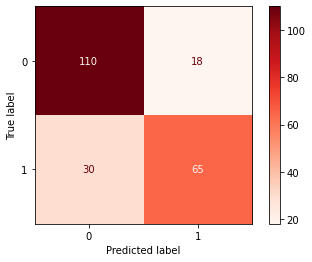

In [101]:
# visualization: confusion matrix of LR
print('Confusion Matrix:')
visualize_LR = plot_confusion_matrix(LR, X_test, y_test, cmap = plt.cm.Reds, values_format = 'd')

In [102]:
# Decision Tree Classifier
DTC = DecisionTreeClassifier(max_depth = 5)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [103]:
# predicting the values for DTC
y_pred_DTC = DTC.predict(X_test)

In [104]:
# show train/test split results of DTC algorithm
print('Train/Test split results:')
print(DTC.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_pred_DTC))

Train/Test split results:
DecisionTreeClassifier accuracy is 0.77578


In [105]:
# using cross validation for DTC algorithm
scores_accuracy = cross_val_score(DTC, X, Y, cv = 10, scoring = 'accuracy')

In [106]:
# show cross validation results of DTC algorithm
print('Cross Validation results:')
print(DTC.__class__.__name__ + " accuracy is %2.5f" % scores_accuracy.mean())

Cross Validation results:
DecisionTreeClassifier accuracy is 0.79017


In [107]:
# using ensemble method (bagging) for DTC algorithm
bag_DTC = BaggingClassifier(
    base_estimator = DTC, 
    n_estimators = 10, 
    n_jobs = -1, 
    random_state = 0
    )

bag_DTC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1,
                  random_state=0)

In [108]:
# show ensemble method (bagging) results of DTC algorithm
print('Bagging results:')
print(DTC.__class__.__name__+" accuracy is %2.5f" % bag_DTC.score(X_test, y_test))

Bagging results:
DecisionTreeClassifier accuracy is 0.77130


In [109]:
# show classification report of DTC algorithm
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       128
           1       0.87      0.56      0.68        95

    accuracy                           0.78       223
   macro avg       0.80      0.75      0.75       223
weighted avg       0.80      0.78      0.76       223



Decision Tree:


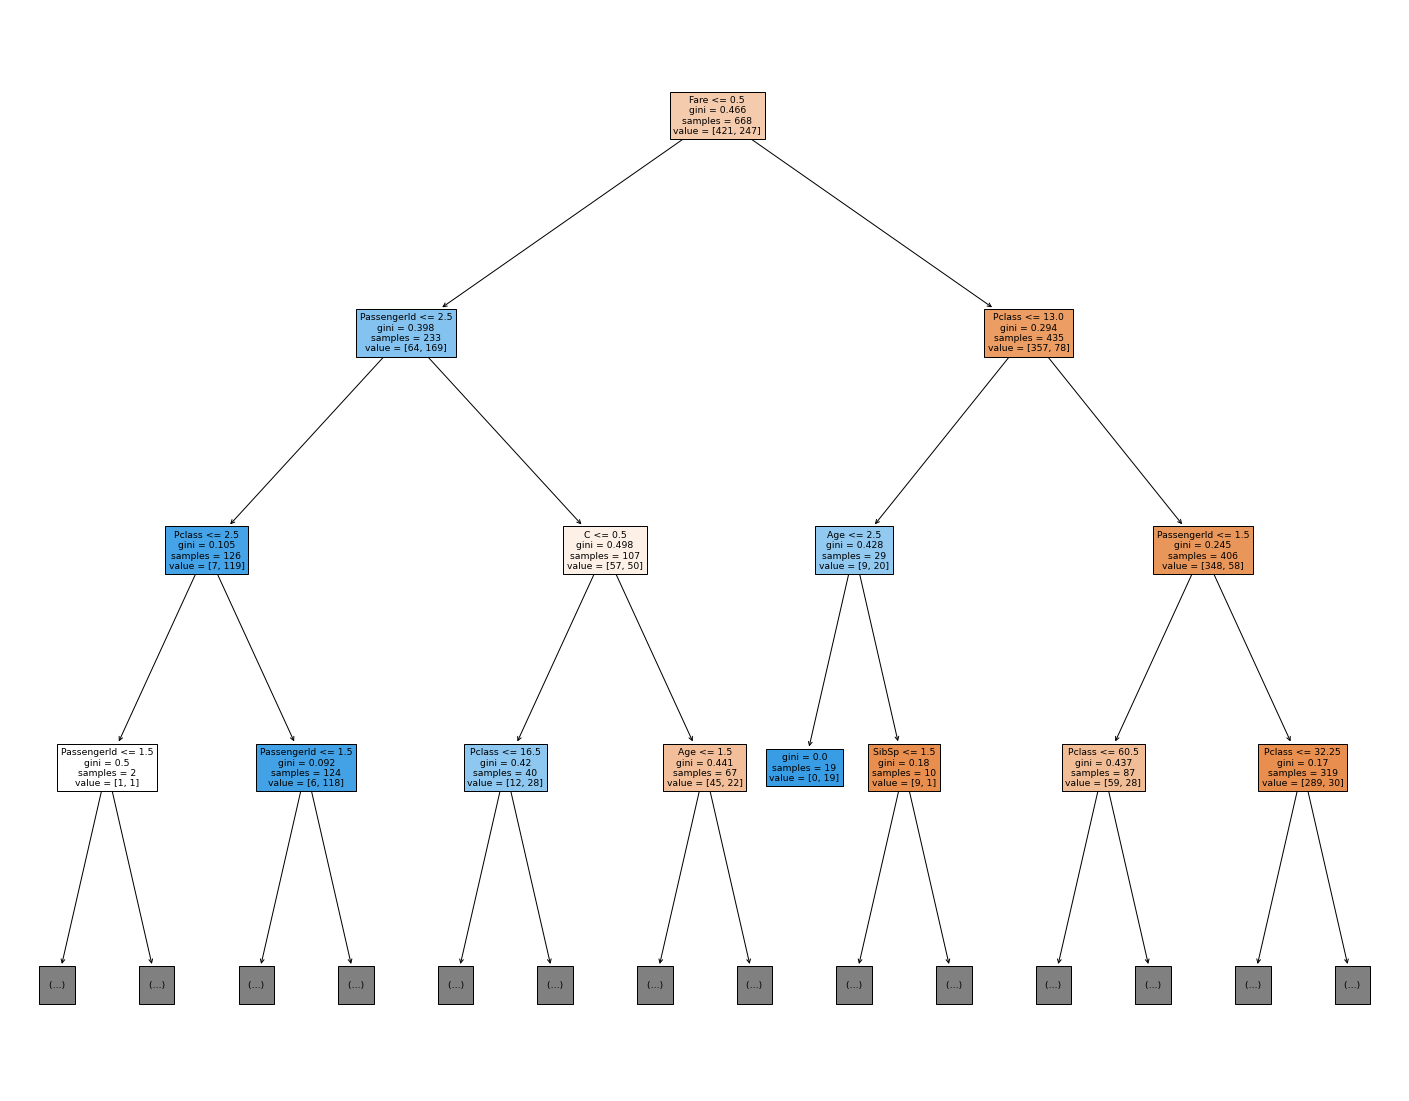

In [69]:
# visualization: decision tree
print('Decision Tree:')
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(DTC,   
                   feature_names = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'male', 'C', 'Q', 'S'],
                   max_depth = 3,
                   filled = True)

In [70]:
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators = 10, max_depth = 5)
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [71]:
# predicting the values for RFC
y_pred_RFC = RFC.predict(X_test)

In [72]:
# show train/test split results of RFC algorithm
print('Train/Test split results:')
print(RFC.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_pred_RFC))

Train/Test split results:
RandomForestClassifier accuracy is 0.78924


In [73]:
# using cross validation for RFC algorithm
scores_accuracy = cross_val_score(RFC, X, Y, cv = 10, scoring = 'accuracy')

In [74]:
# show cross validation results of RFC algorithm
print('Cross Validation results:')
print(RFC.__class__.__name__ + " accuracy is %2.5f" % scores_accuracy.mean())

Cross Validation results:
RandomForestClassifier accuracy is 0.81824


In [75]:
# using ensemble method (bagging) for RFC algorithm
bag_RFC = BaggingClassifier(
    base_estimator = RFC, 
    n_estimators = 10, 
    n_jobs = -1, 
    random_state = 0
    )

bag_RFC.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                        n_estimators=10),
                  n_jobs=-1, random_state=0)

In [76]:
# show ensemble method (bagging) results of RFC algorithm
print('Bagging results:')
print(RFC.__class__.__name__+" is %2.5f" % bag_RFC.score(X_test, y_test))

Bagging results:
RandomForestClassifier is 0.78027


In [111]:
# show classification report of RFC algorithm
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       128
           1       0.85      0.61      0.71        95

    accuracy                           0.79       223
   macro avg       0.81      0.77      0.77       223
weighted avg       0.80      0.79      0.78       223



Confusion Matrix:


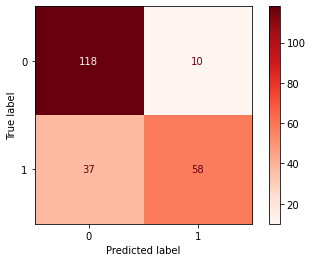

In [77]:
# visualization: confusion matrix of RFC
print('Confusion Matrix:')
visualize_RFC = plot_confusion_matrix(RFC, X_test, y_test, cmap = plt.cm.Reds, values_format = 'd')